In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Captain of His Soul,1918
1,Qing chun xing,1975
2,Tangled Web (II),2008
3,The Shepherd of the Hills,1919
4,Anna mit'n Flimmerfimmel,1919


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
s = c.groupby(['character', 'year']).size()
a = s.unstack(0).fillna(0)
p = a['Superman'] - a['Batman']
p[p > 0]

year
1948    1.0
1950    1.0
1951    2.0
1954    5.0
1955    1.0
1973    1.0
1978    1.0
1980    2.0
1983    2.0
1987    1.0
2006    1.0
dtype: float64

In [6]:
print('There are ' + str(len(p[p > 0])) + ' Superman Years.')

There are 11 Superman Years.


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
b = c.groupby(['character', 'year']).size()
d = b.unstack(0).fillna(0)
q = d.Batman - d.Superman
print('There are ' + str(len(q[q > 0])) + ' Batman Years.')

There are 26 Batman Years.


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

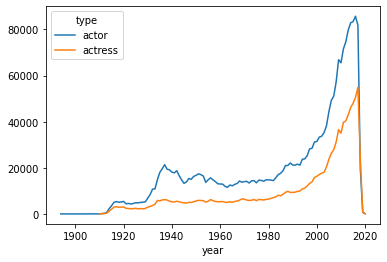

In [18]:
c = cast
c = c[c.year <= 2020].groupby(['year', 'type']).size()
c.unstack('type').plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year'>

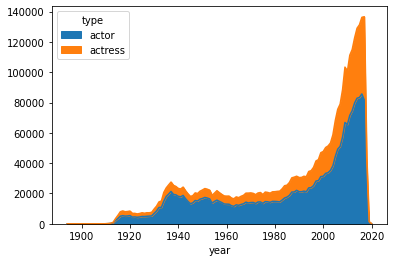

In [20]:
c = cast
c = c[c.year <= 2020].groupby(['year', 'type']).size()
c.unstack('type').plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

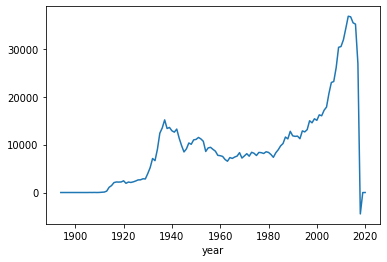

In [27]:
c = cast
c = c[c.year <= 2020]
f = c.groupby(['year', 'type']).size()
f = f.unstack('type').fillna(0)
f = f.actor - f.actress
f.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

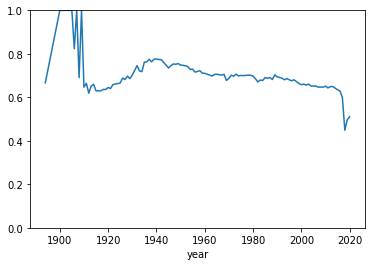

In [30]:
c = cast
c = c[c.year <= 2020]
f = c.groupby(['year', 'type']).size()
f = f.unstack('type').fillna(0)
f = f.actor / (f.actor + f.actress)
f.plot(ylim = [0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

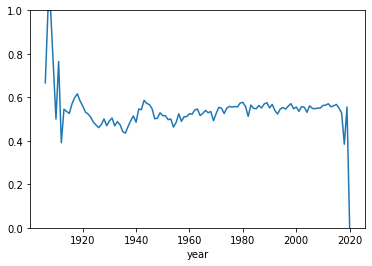

In [31]:
c = cast
c = c[(c.year <= 2020) & (c.n == 2)]
g = c.groupby(['year', 'type']).size()
g = g.unstack('type').fillna(0)
g = g.actor / (g.actor + g.actress)
g.plot(ylim = [0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<AxesSubplot:xlabel='year'>

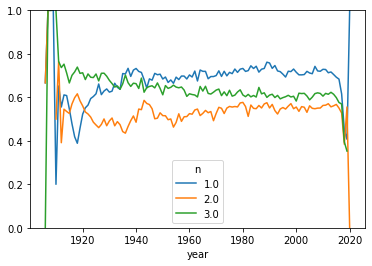

In [33]:
c = cast
c = c[(c.year <= 2020) & (c.n >= 1) & (c.n <=3)]
g = c.groupby(['year', 'type', 'n']).size()
g = g.unstack(['type', 'n']).fillna(0)
g = g.actor / (g.actor + g.actress)
g.plot(ylim = [0,1])